In [16]:
###IMPORTING THE MODULES.
import gym
import numpy as np
from IPython.display import clear_output
from time import sleep
import random
import matplotlib.pyplot as plt

### Initialising the environment

In [17]:
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [18]:
##Printing action and state space
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


In [19]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [20]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [21]:
epochs = 0
penalties, reward = 0, 0
total_epochs, total_penalties = 0, 0

frames = []  #for animation
all_rewards =[] ##For calculating all the rewards
episode_reward = 0 ##For calculating all the rewards
episodes = 1000 ##the number of episode you want to run the environment
for i in range (episodes): ##Creating a loop that runs though all the episodes
    state = env.reset() ##Resets the environment and returns a random initial state.

    epochs, penalties, reward, = 0, 0, 0
    episode_reward = 0
    done = False
    while not done:
        action = env.action_space.sample() ##taking action through the action space
        state, reward, done, info = env.step(action)
        episode_reward += reward ##storing reward for each episode

        if reward == -10:  ##storing penalties
            penalties += 1

#         # Put each rendered frame into dict for animation
#         frames.append({
#             'frame': env.render(mode='ansi'),
#             'state': state,
#             'action': action,
#             'reward': reward
#             }
#         )

        epochs += 1 ##number of passes of the entire training dataset
    total_penalties += penalties
    total_epochs += epochs
    all_rewards.append(episode_reward) ##storing rewards for all episodes

##Printing the results.
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 1000 episodes:
Average timesteps per episode: 2464.853
Average penalties per episode: 797.518


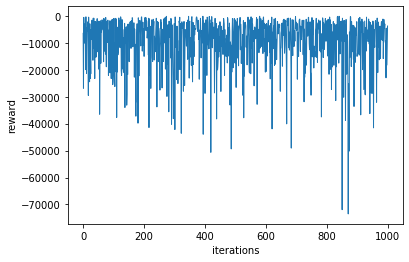

In [22]:
##Plotting the results
plt.plot(all_rewards, linewidth = 1)
plt.ylabel('reward')
plt.xlabel('iterations')
plt.show()

In [23]:
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

In [24]:
%%time
#initialise the q table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table)
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []
episode_rewards = 0
q_rewards = []

#train over 10,000 episodes
for i in range(1, 10001):
    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    episode_rewards = 0
    done = False
    
    while not done:
        '''explores the action space by evaluating epsilon value with a random number,
        if value is less than epsilon value, it explors or else use the q table to take action'''
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        episode_rewards += reward #Calculating rewards for each episode
        '''updating the q table with max rewards'''
        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
    
    q_rewards.append(episode_rewards) ##storing all the rewards
   
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 10000
Training finished.

Wall time: 4.83 s


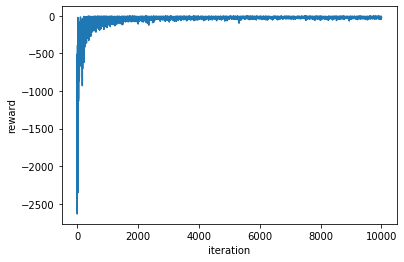

In [25]:
##plotting the results
plt.plot(q_rewards)
plt.ylabel('reward')
plt.xlabel('iteration')
plt.show()

In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 10

for i in range(episodes): ##Creating a loop that runs though all the episodes
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")